# Notebook de Regresión Lineal: Simple y Múltiple
Este notebook explica paso a paso cómo implementar, visualizar y evaluar modelos de regresión lineal.

## 1. Importación de Librerías

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.simplefilter('ignore')

sns.set_theme(style="whitegrid")
pd.options.display.float_format = '{:,.2f}'.format

## 2. Creación del Conjunto de Datos
Simularemos un conjunto de datos de precios de viviendas. El precio (`precio_miles_usd`) dependerá del área de la casa (`area_m2`), el número de habitaciones (`habitaciones`) y la antigüedad (`antiguedad_anos`).

In [17]:
np.random.seed(42)
n_casas = 200
area_m2 = np.random.normal(loc=150, scale=40, size=n_casas).clip(min=50)
habitaciones = np.random.randint(2, 6, size=n_casas)
antiguedad_anos = np.random.normal(loc=15, scale=10, size=n_casas).clip(min=1)

# El precio se basa en una relación lineal con ruido aleatorio
precio_miles_usd = (1.8 * area_m2 + 15 * habitaciones - 2.5 * antiguedad_anos + np.random.normal(0, 25, n_casas)).clip(min=50)

df = pd.DataFrame({
    'area_m2': area_m2,
    'habitaciones': habitaciones,
    'antiguedad_anos': antiguedad_anos,
    'precio_miles_usd': precio_miles_usd
})

print("Primeras filas del DataFrame:")
display(df.head())

Primeras filas del DataFrame:


,area_m2,habitaciones,antiguedad_anos,precio_miles_usd
0,169.87,3,13.48,300.89
1,144.47,3,20.88,225.80
2,175.91,2,17.81,344.29
3,210.92,5,8.77,454.77
4,140.63,2,12.92,250.64


## 3. Análisis Exploratorio y Visualización
Antes de modelar, es crucial entender los datos y las relaciones entre las variables.

### Distribuciones de las variables
Usamos histogramas para ver la distribución de cada variable.

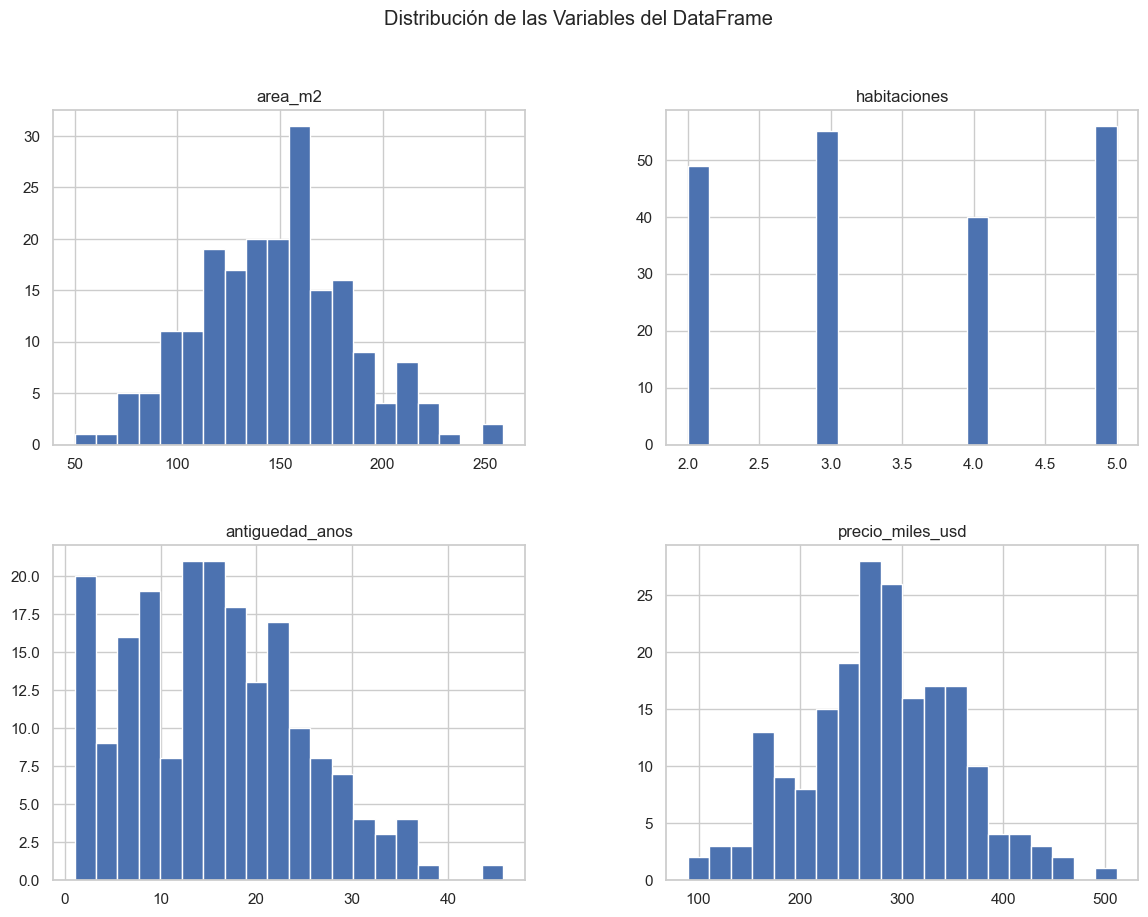

In [18]:
df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribución de las Variables del DataFrame')
plt.show()

### Matriz de Correlación
Visualizamos la correlación de Pearson para identificar qué variables tienen una relación lineal más fuerte con el precio.

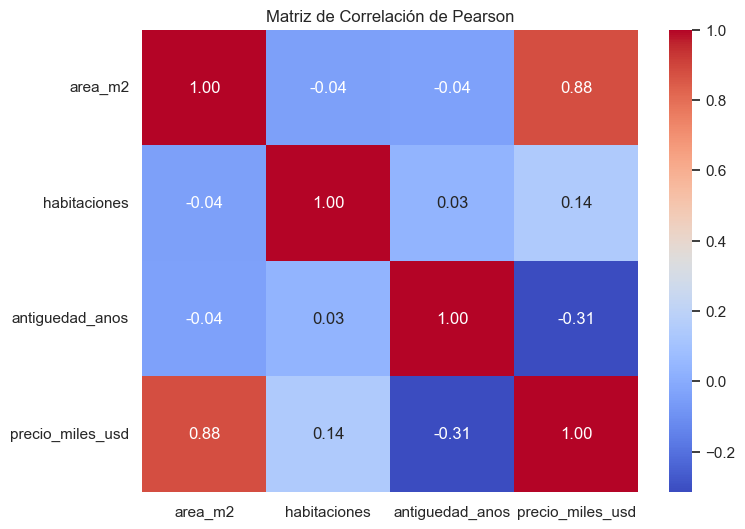

Observamos una fuerte correlación positiva entre `area_m2` y `precio_miles_usd`, lo que la hace un buen candidato para la regresión simple.


In [19]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Pearson')
plt.show()
print('Observamos una fuerte correlación positiva entre `area_m2` y `precio_miles_usd`, lo que la hace un buen candidato para la regresión simple.')

## 4. Preprocesamiento de Datos

### Normalización (Escalado Min-Max)
Escalamos las características a un rango [0, 1]. Esto ayuda a que el algoritmo de regresión converja más rápido y no dé más peso a una característica solo por tener una escala mayor.

In [20]:
features = ['area_m2', 'habitaciones', 'antiguedad_anos']
target = 'precio_miles_usd'

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

print("DataFrame con características normalizadas:")
display(df_scaled.head())

DataFrame con características normalizadas:


,area_m2,habitaciones,antiguedad_anos,precio_miles_usd
0,0.57,0.33,0.28,300.89
1,0.45,0.33,0.44,225.80
2,0.60,0.00,0.38,344.29
3,0.77,1.00,0.17,454.77
4,0.43,0.00,0.27,250.64


### División en Conjuntos de Entrenamiento y Prueba (Train-Test Split)
Dividimos los datos para entrenar el modelo con una parte (80%) y evaluarlo con otra parte que nunca ha visto (20%).

In [21]:
X = df_scaled[features]
y = df_scaled[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} registros')

Tamaño del conjunto de entrenamiento: 160 registros
Tamaño del conjunto de prueba: 40 registros


## 5. Regresión Lineal Simple
Usaremos solo la variable `area_m2` para predecir el `precio_miles_usd`.

### Entrenamiento del Modelo Simple

In [22]:
# Seleccionamos solo la columna 'area_m2' para el modelo simple
X_train_simple = X_train[['area_m2']]
X_test_simple = X_test[['area_m2']]

lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train)

print('Modelo de Regresión Simple entrenado.')
print(f'Coeficiente (pendiente): {lr_simple.coef_[0]:.2f}')
print(f'Intercepto: {lr_simple.intercept_:.2f}')

Modelo de Regresión Simple entrenado.
Coeficiente (pendiente): 378.33
Intercepto: 100.79


### Visualización del Modelo Simple

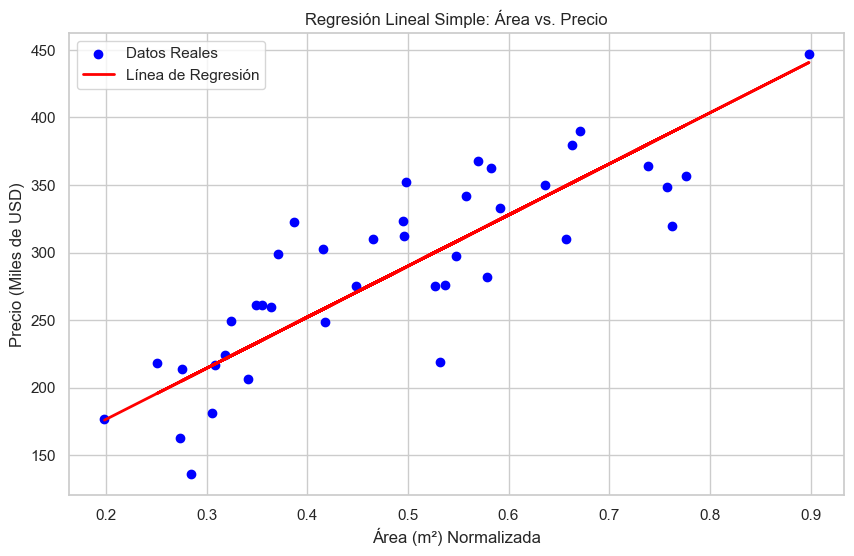

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Datos Reales')
plt.plot(X_test_simple, lr_simple.predict(X_test_simple), color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Área (m²) Normalizada')
plt.ylabel('Precio (Miles de USD)')
plt.title('Regresión Lineal Simple: Área vs. Precio')
plt.legend()
plt.show()

### Predicciones y Métricas de Evaluación (Simple)

In [24]:
y_pred_simple = lr_simple.predict(X_test_simple)

r2_simple = metrics.r2_score(y_test, y_pred_simple)
mae_simple = metrics.mean_absolute_error(y_test, y_pred_simple)
mse_simple = metrics.mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print('Métricas para el Modelo de Regresión Simple:')
print(f'R-cuadrado (R²): {r2_simple:.4f}')
print(f'Error Absoluto Medio (MAE): {mae_simple:.4f}')
print(f'Error Cuadrático Medio (MSE): {mse_simple:.4f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_simple:.4f}')

Métricas para el Modelo de Regresión Simple:
R-cuadrado (R²): 0.6984
Error Absoluto Medio (MAE): 31.2731
Error Cuadrático Medio (MSE): 1417.8493
Raíz del Error Cuadrático Medio (RMSE): 37.6543


## 6. Regresión Lineal Múltiple
Ahora usamos todas las variables (`area_m2`, `habitaciones`, `antiguedad_anos`) para predecir el precio.

### Entrenamiento del Modelo Múltiple

In [25]:
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

print('Modelo de Regresión Múltiple entrenado.')
print('Coeficientes:')
for feature, coef in zip(features, lr_multiple.coef_):
    print(f'  - {feature}: {coef:.2f}')
print(f'Intercepto: {lr_multiple.intercept_:.2f}')

Modelo de Regresión Múltiple entrenado.
Coeficientes:
  - area_m2: 364.66
  - habitaciones: 34.40
  - antiguedad_anos: -113.40
Intercepto: 126.25


### Visualización del Modelo Múltiple
Como no podemos graficar en más de 3 dimensiones, una buena técnica es graficar los valores reales contra los valores predichos. Si el modelo es bueno, los puntos deberían alinearse en una diagonal.

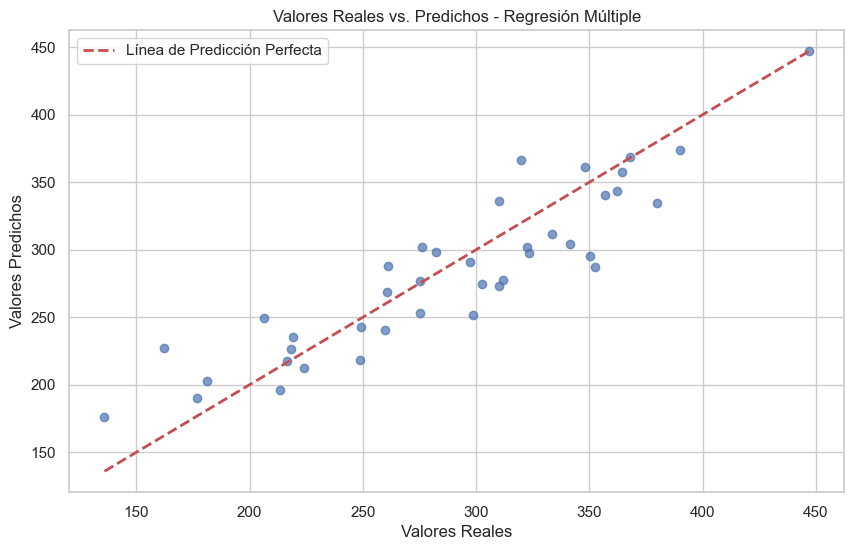

In [26]:
y_pred_multiple = lr_multiple.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Línea de Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos - Regresión Múltiple')
plt.legend()
plt.show()

### Predicciones y Métricas de Evaluación (Múltiple)

In [27]:
r2_multiple = metrics.r2_score(y_test, y_pred_multiple)
mae_multiple = metrics.mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = metrics.mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)

print('Métricas para el Modelo de Regresión Múltiple:')
print(f'R-cuadrado (R²): {r2_multiple:.4f}')
print(f'Error Absoluto Medio (MAE): {mae_multiple:.4f}')
print(f'Error Cuadrático Medio (MSE): {mse_multiple:.4f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_multiple:.4f}')

Métricas para el Modelo de Regresión Múltiple:
R-cuadrado (R²): 0.8175
Error Absoluto Medio (MAE): 24.0232
Error Cuadrático Medio (MSE): 858.2230
Raíz del Error Cuadrático Medio (RMSE): 29.2954


## 7. Comparación y Predicción para un Nuevo Registro

### Comparación de Métricas

In [28]:
metrics_comparison = pd.DataFrame({
    'Regresión Simple': [r2_simple, mae_simple, mse_simple, rmse_simple],
    'Regresión Múltiple': [r2_multiple, mae_multiple, mse_multiple, rmse_multiple]
}, index=['R-cuadrado (R²)', 'MAE', 'MSE', 'RMSE'])

display(metrics_comparison)
print('Conclusión: El modelo de regresión múltiple es significativamente mejor. Tiene un R² más alto (explica más varianza) y errores (MAE, MSE, RMSE) más bajos.')

,Regresión Simple,Regresión Múltiple
R-cuadrado (R²),0.70,0.82
MAE,31.27,24.02
MSE,"1,417.85",858.22
RMSE,37.65,29.30


Conclusión: El modelo de regresión múltiple es significativamente mejor. Tiene un R² más alto (explica más varianza) y errores (MAE, MSE, RMSE) más bajos.


### Predicción para un nuevo registro
Supongamos que queremos predecir el precio de una casa nueva con las siguientes características:
- Área: 180 m²
- Habitaciones: 3
- Antigüedad: 5 años

In [29]:
# 1. Crear un DataFrame con los nuevos datos
nueva_casa = pd.DataFrame({
    'area_m2': [180],
    'habitaciones': [3],
    'antiguedad_anos': [5]
})

print("Datos de la nueva casa:")
display(nueva_casa)

# 2. Normalizar los datos usando el MISMO escalador que ajustamos antes
nueva_casa_scaled = scaler.transform(nueva_casa)

print("Datos normalizados:")
print(nueva_casa_scaled)

# 3. Realizar la predicción con el modelo múltiple
prediccion_precio = lr_multiple.predict(nueva_casa_scaled)

print(f'El precio predicho para la nueva casa es: ${prediccion_precio[0]:,.2f} miles de USD.')

Datos de la nueva casa:


,area_m2,habitaciones,antiguedad_anos
0,180,3,5


Datos normalizados:
[[0.62258519 0.33333333 0.08930803]]
El precio predicho para la nueva casa es: $354.62 miles de USD.
